## 🔍 **¿Qué es KNN?**

K-Nearest Neighbors (**KNN**) es un **algoritmo supervisado** que se utiliza tanto en **clasificación** como en **regresión**.  
La idea es sencilla: **para predecir la clase o el valor de un punto nuevo, el algoritmo busca los "K" puntos más cercanos en el conjunto de entrenamiento y toma una decisión en función de ellos**.

---

## ⚙️ **Conceptos clave**
- **K**: número de vecinos a considerar  
- **Distancia**: mide qué tan cerca están dos puntos. Normalmente se usa la **distancia Euclídea**  
- **Clasificación**: se asigna la clase más común entre los K vecinos  
- **Regresión**: se asigna el promedio de los valores entre los K vecinos

---

## ✏️ **Notación matemática**

### Datos
$
D = \{(x^{(i)}, y^{(i)})\}_{i=1}^N
$ 


- $ x^{(i)} \in \mathbb{R}^n $: vector de características  
- $ y^{(i)} $: etiqueta (clase o valor)

### Distancia Euclídea
$
d(x, x^{(i)}) = \sqrt{\sum_{j=1}^{n} (x_j - x_j^{(i)})^2}
$

### Clasificación (votación mayoritaria)
$
\hat{y} = \text{moda}(\{y^{(i)} : x^{(i)} \in \mathcal{N}_k(x)\})
$
Donde $ \mathcal{N}_k(x) $ son los $ k $ vecinos más cercanos a $ x $.

### Regresión (promedio de los vecinos)
$
\hat{y} = \frac{1}{k} \sum_{x^{(i)} \in \mathcal{N}_k(x)} y^{(i)}
$

---

## 🎯 **KNN en Clasificación**  
### 🔧 Generación de datos artificiales



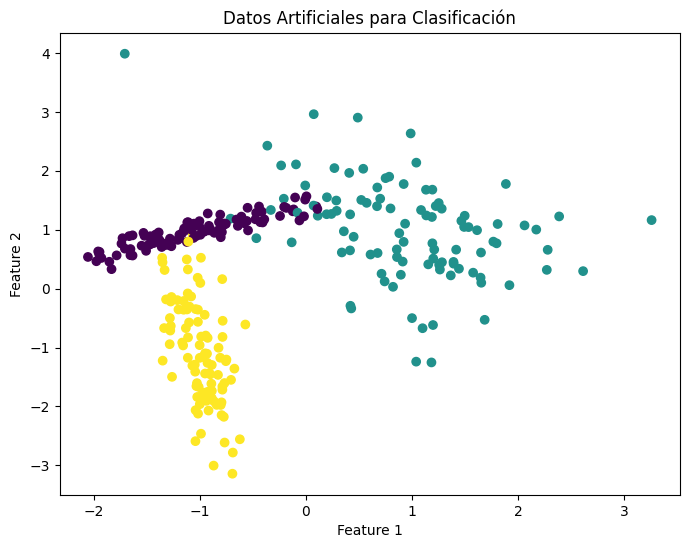

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Datos artificiales
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=3, random_state=42)

# Visualización de los datos
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Datos Artificiales para Clasificación')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 🔧 Entrenamiento del modelo

Accuracy: 0.9333333333333333

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.95      0.91      0.93        23
           2       1.00      0.94      0.97        18

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60



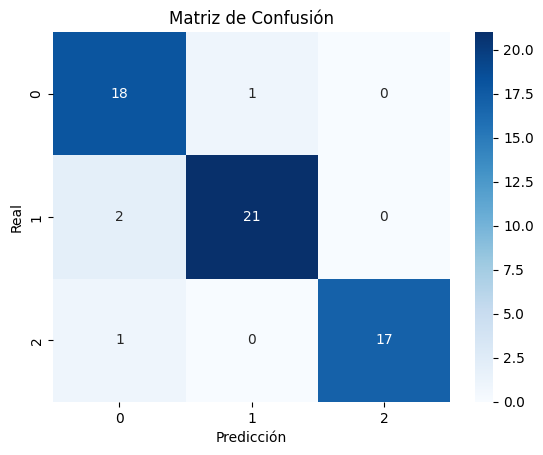

In [2]:
# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo con K=5
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Predicciones
y_pred = knn_clf.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

## 5. 📈 **KNN en Regresión**  


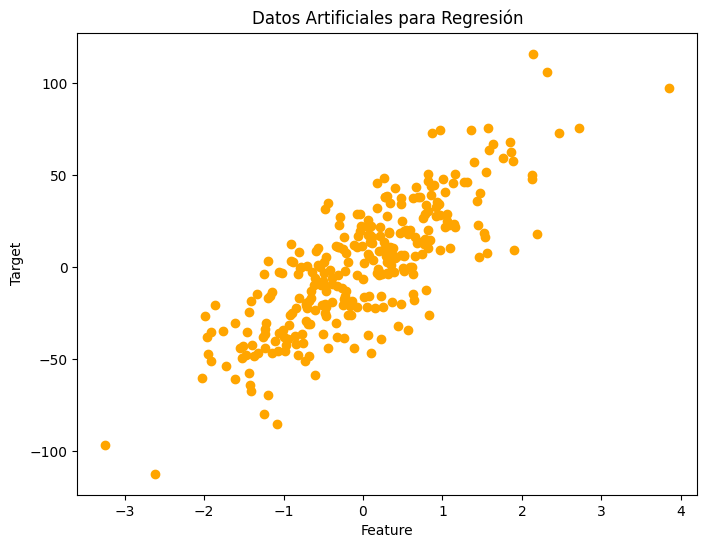

In [3]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Datos artificiales
X, y = make_regression(n_samples=300, n_features=1, noise=20, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(X, y, color='orange')
plt.title('Datos Artificiales para Regresión')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

Mean Squared Error: 532.062986093338


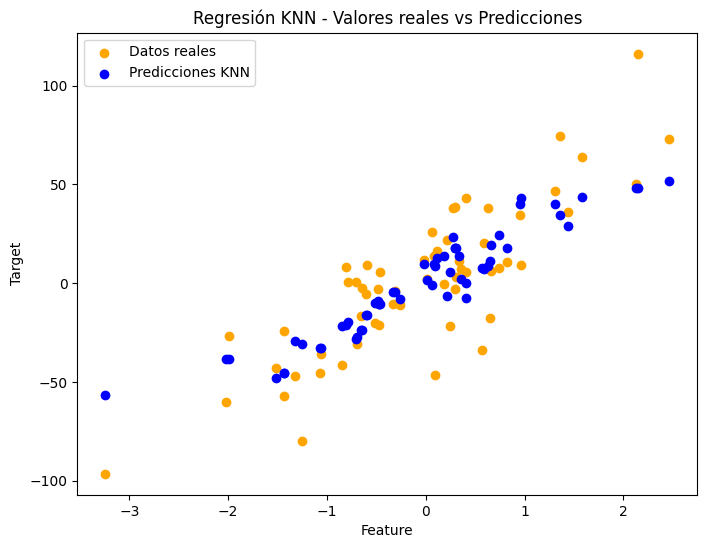

In [4]:
# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión con K=5
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predicciones
y_pred = knn_reg.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualización
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='orange', label='Datos reales')
plt.scatter(X_test, y_pred, color='blue', label='Predicciones KNN')
plt.legend()
plt.title('Regresión KNN - Valores reales vs Predicciones')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()


## 📝 **Actividades sugeridas**
1. Experimenta con diferentes valores de **K** y observa el impacto.  
2. Normaliza los datos antes de usar KNN.  
3. Cambia la métrica de distancia a Manhattan o Minkowski.  
4. Usa KNN en un dataset real como **Iris** o **Boston Housing**.



# 🧪 Ejemplo: Comparando Distancias en KNN y su Frontera de Decisión

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

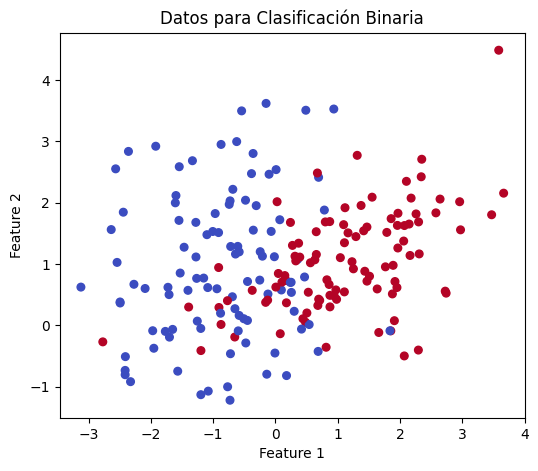

In [6]:
# Datos sintéticos para visualización clara (2D)
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=2, random_state=42)

# Visualización básica de los puntos
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
plt.title('Datos para Clasificación Binaria')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [7]:
def plot_decision_boundary(knn, X, y, ax, title):
    # Crear malla para graficar
    h = .02  # paso
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predicciones sobre la malla
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Graficar frontera
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

### 🔧 Entrenamiento de KNN con diferentes distancias

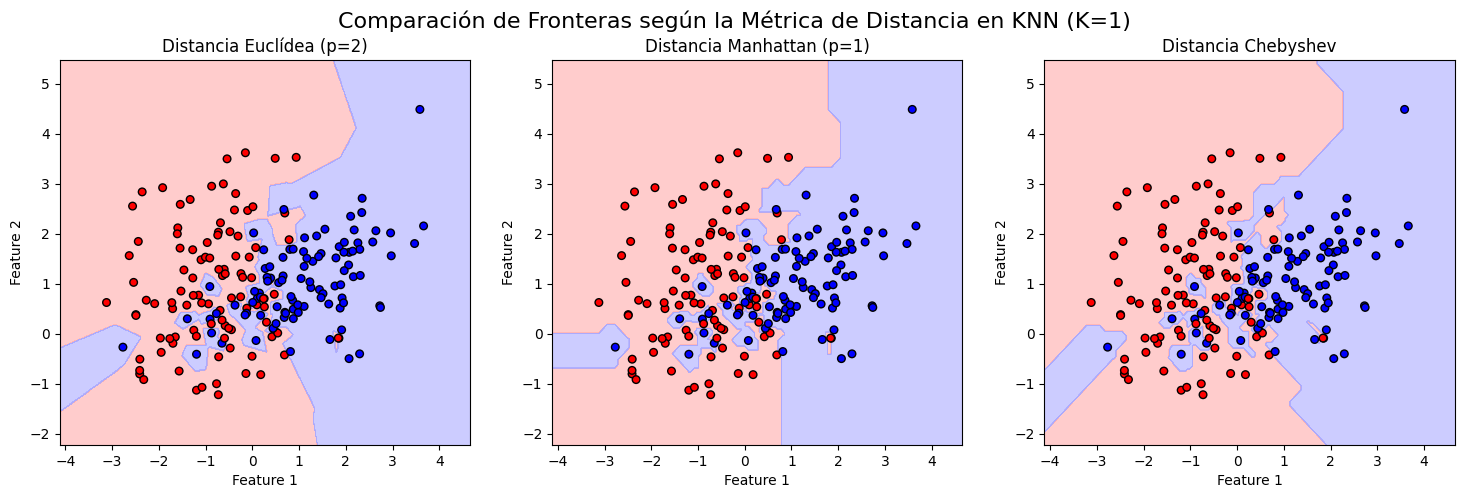

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
k=1
# KNN con distancia Euclídea (p=2)
knn_euclidean = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
knn_euclidean.fit(X, y)
plot_decision_boundary(knn_euclidean, X, y, axes[0], 'Distancia Euclídea (p=2)')

# KNN con distancia Manhattan (p=1)
knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski')
knn_manhattan.fit(X, y)
plot_decision_boundary(knn_manhattan, X, y, axes[1], 'Distancia Manhattan (p=1)')

# KNN con distancia Chebyshev
knn_chebyshev = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
knn_chebyshev.fit(X, y)
plot_decision_boundary(knn_chebyshev, X, y, axes[2], 'Distancia Chebyshev')

plt.suptitle(f'Comparación de Fronteras según la Métrica de Distancia en KNN (K={k})', fontsize=16)
plt.show()



### 🔍 ¿Qué pasa aquí?
- **Euclidiana (p=2)**: círculos concéntricos para determinar el vecino más cercano. Fronteras más suaves y curvas.  
- **Manhattan (p=1)**: se basa en la "distancia en calles" (como si caminaras en una cuadrícula). Las fronteras son más cuadradas y alineadas a los ejes.  
- **Chebyshev**: toma el máximo de las diferencias absolutas. Las regiones son cuadradas porque mide la mayor diferencia en un solo eje.

---
